In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/Users/igmark/Desktop/WGU Data Files/D208_churn_clean.csv"
df = pd.read_csv(file_path)

In [3]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

# Detecting/Visualizing Outliers for Continuous Variables

## Children

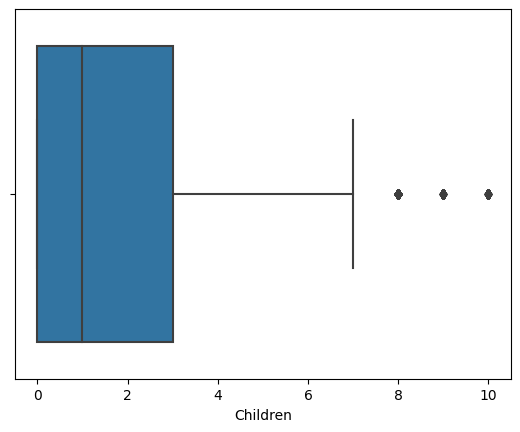

In [6]:
boxplot=seaborn.boxplot(x='Children',data=df)

## Tenure

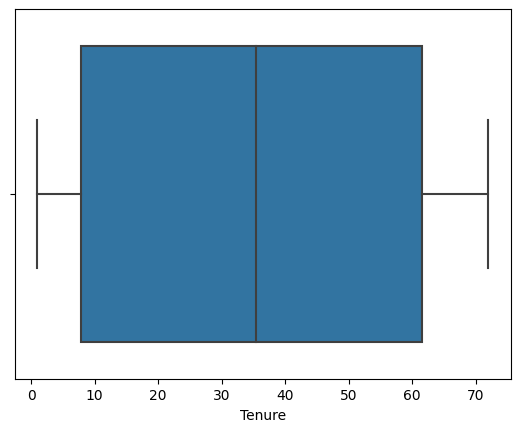

In [7]:
boxplot=seaborn.boxplot(x='Tenure',data=df)

## Yearly_equip_failure

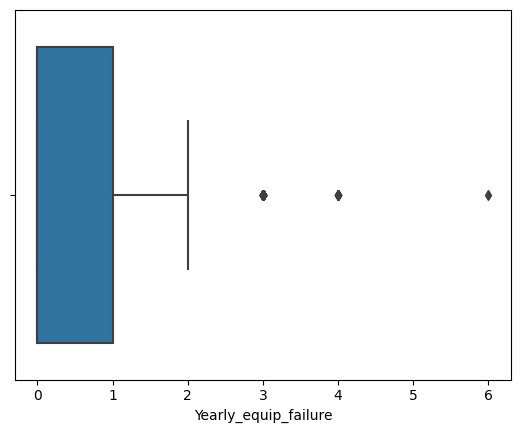

In [8]:
boxplot=seaborn.boxplot(x='Yearly_equip_failure',data=df)

## MonthlyCharge

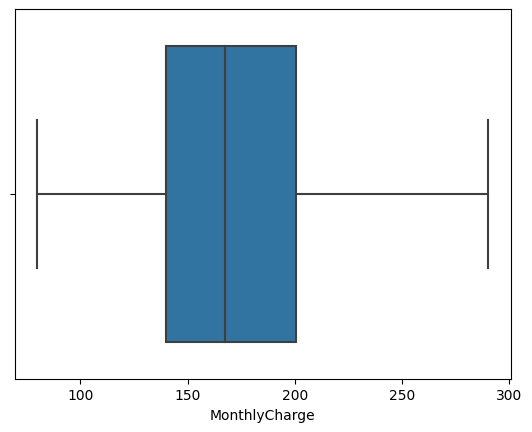

In [9]:
boxplot=seaborn.boxplot(x='MonthlyCharge',data=df)

## Age

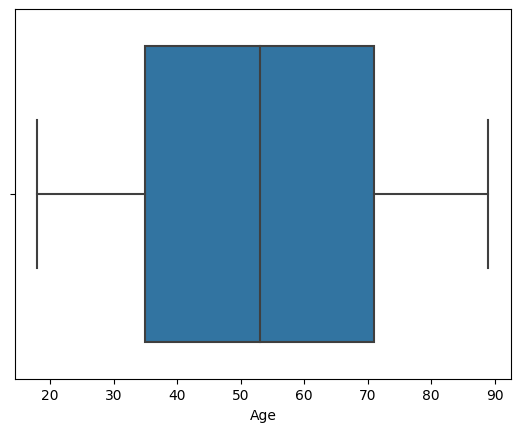

In [10]:
boxplot=seaborn.boxplot(x='Age',data=df)

## Income

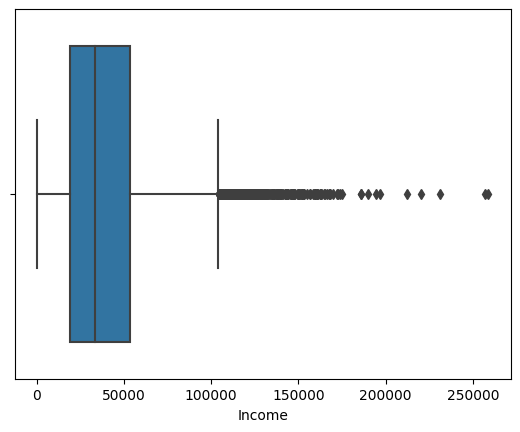

In [11]:
boxplot=seaborn.boxplot(x='Income',data=df)

## Email

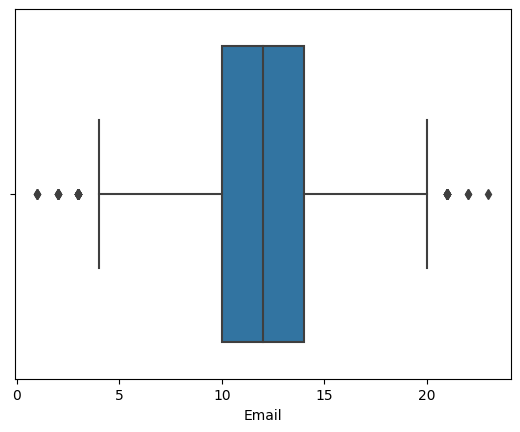

In [12]:
boxplot=seaborn.boxplot(x='Email',data=df)

## Contacts

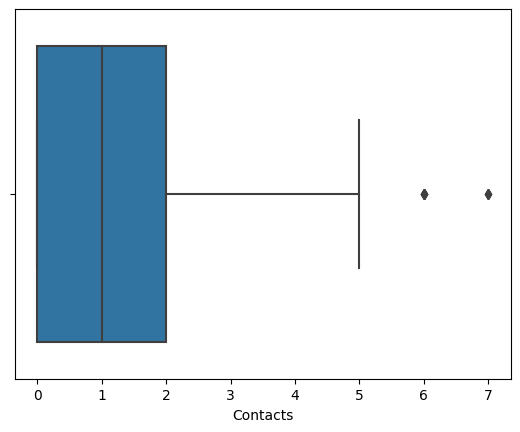

In [13]:
boxplot=seaborn.boxplot(x='Contacts',data=df)

## Population

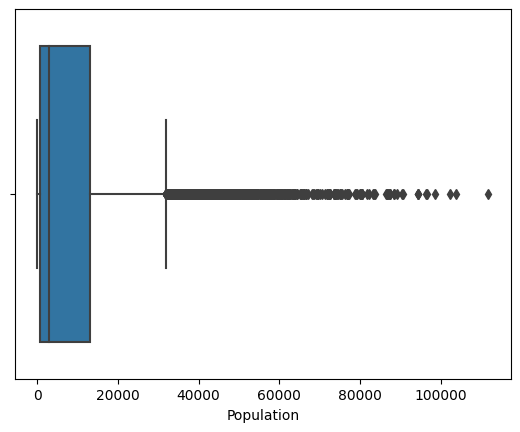

In [14]:
boxplot=seaborn.boxplot(x='Population',data=df)

## Outage_sec_perweek

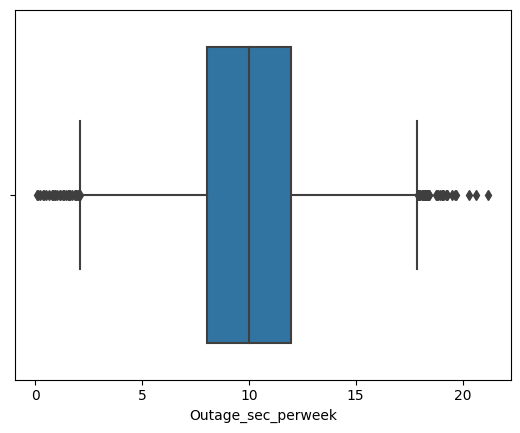

In [15]:
boxplot=seaborn.boxplot(x='Outage_sec_perweek',data=df)

## Removal of outliers

In [16]:
# check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


array([[<AxesSubplot: title={'center': 'CaseOrder'}>,
        <AxesSubplot: title={'center': 'Zip'}>,
        <AxesSubplot: title={'center': 'Lat'}>,
        <AxesSubplot: title={'center': 'Lng'}>,
        <AxesSubplot: title={'center': 'Population'}>],
       [<AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>],
       [<AxesSubplot: title={'center': 'Contacts'}>,
        <AxesSubplot: title={'center': 'Yearly_equip_failure'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>,
        <AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>],
       [<AxesSubplot: title={'center': 'Item1'}>,
        <AxesSubplot: title={'center': 'Item2'}>,
        <AxesSubplot: title={'center': 'Item3'}>,
        <AxesSubplot: title={'center': '

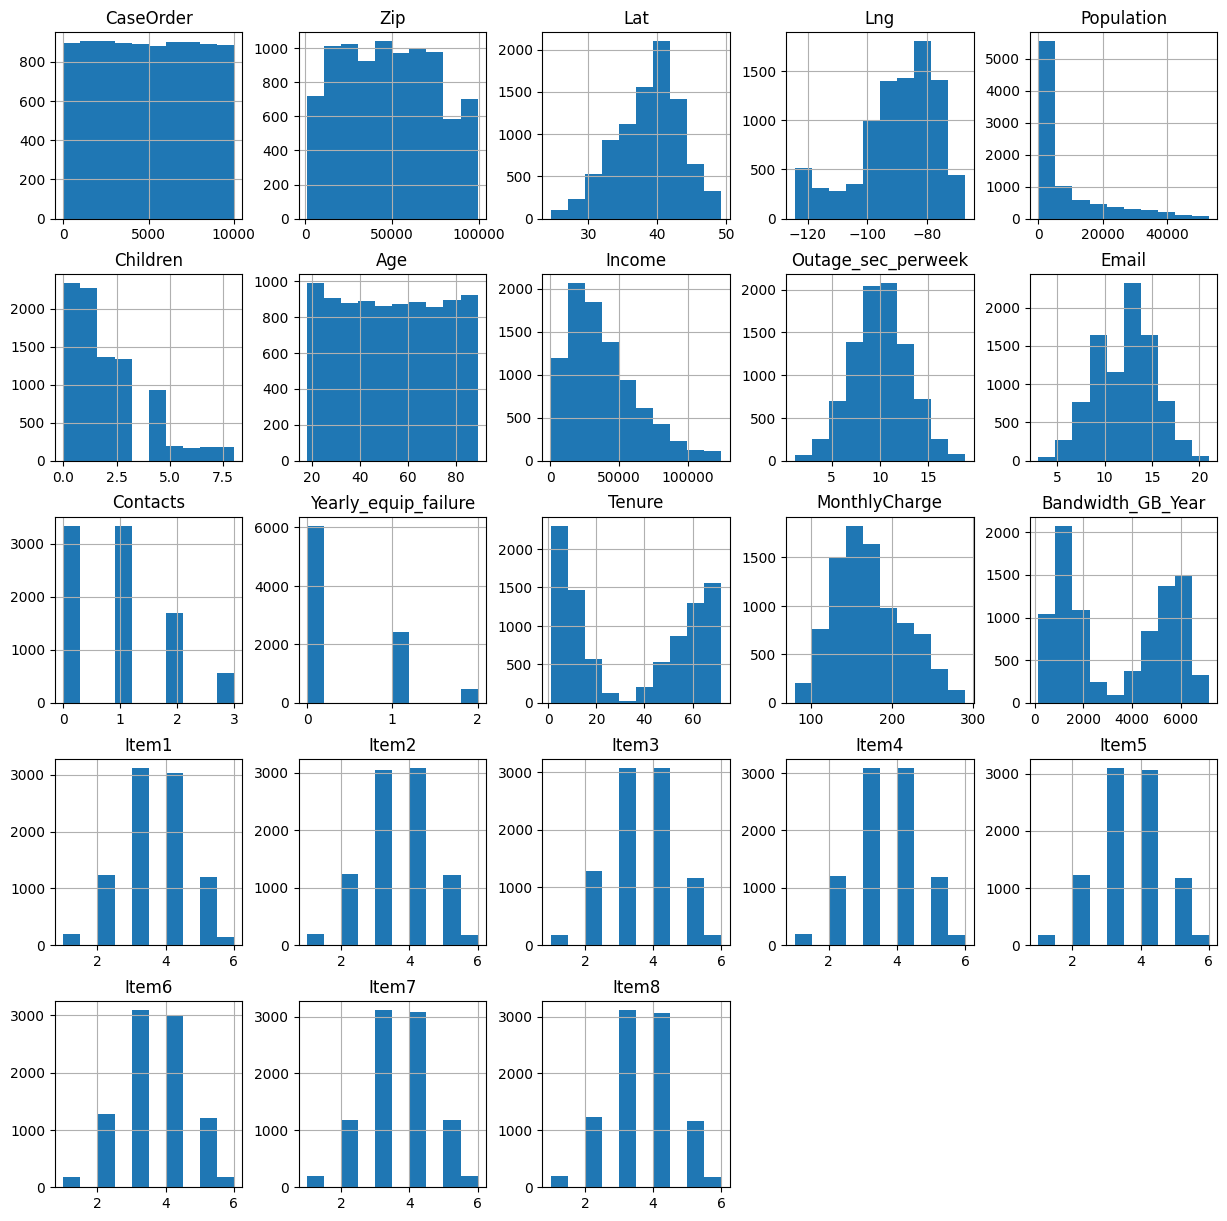

In [17]:
df.hist(figsize = (15,15))

In [18]:
#Drop the less meaningful columns

df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                      'TimeZone', 'Job','Marital', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
                      'OnlineSecurity', 'OnlineBackup', 'Area','DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                      'PaymentMethod', 'Item1', 'Item2', 
                      'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [19]:
# Display the dimension of dataframe
df.shape

(8950, 15)

In [20]:
# display data set with all the columns
df.head() 

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,TechSupport,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,10446,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,No,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,No,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,Yes,1.670972,149.948316,271.493436
5,17701,3,83,22660.20,Female,No,8.420993,15,3,1,No,No,7.000994,185.007692,1039.357983


In [21]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,8508.409274,1.941453,53.161341,38329.400298,10.009065,12.021676,0.941676,0.374749,34.423473,172.783589,3379.459169
std,11759.988903,1.890668,20.634274,25123.528844,2.926500,3.011651,0.900798,0.582945,26.445276,42.990050,2185.204136
min,0.000000,0.000000,18.000000,348.670000,1.144796,3.000000,0.000000,0.000000,1.005104,79.978860,155.506715
25%,727.250000,0.000000,35.000000,19041.117500,8.031398,10.000000,0.000000,0.000000,7.892645,139.979239,1228.078013
50%,2750.000000,1.000000,53.000000,32778.475000,10.016014,12.000000,1.000000,0.000000,29.772986,167.484705,3120.633000
75%,11838.750000,3.000000,71.000000,52280.437500,11.961618,14.000000,2.000000,1.000000,61.389790,202.443300,5579.370794
max,52967.000000,8.000000,89.000000,124025.100000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419,7158.981530


In [22]:
# Validate there are no nulls
df.isnull().sum()

Population              0
Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
TechSupport             0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [23]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]

In [24]:
# Drop original categorical features from dataframe
df = df.drop(columns=['Gender', 'Churn', 'Techie','TechSupport'])

array([[<AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>,
        <AxesSubplot: title={'center': 'Contacts'}>,
        <AxesSubplot: title={'center': 'Yearly_equip_failure'}>],
       [<AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>,
        <AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>,
        <AxesSubplot: title={'center': 'DummyChurn'}>],
       [<AxesSubplot: title={'center': 'DummyGender'}>,
        <AxesSubplot: title={'center': 'DummyTechie'}>,
        <AxesSubplot: title={'center': 'DummyTechSupport'}>,
        <AxesSubplot: >]], dtype=object)

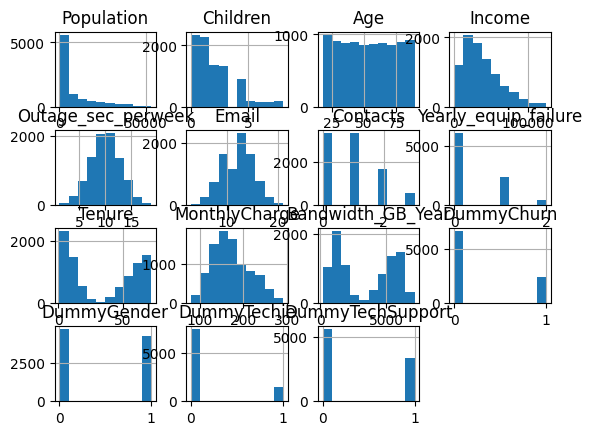

In [25]:
df.hist()

In [26]:
df.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'DummyChurn', 'DummyGender', 'DummyTechie',
       'DummyTechSupport'],
      dtype='object')

# Unique Values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 1 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            8950 non-null   int64  
 1   Children              8950 non-null   int64  
 2   Age                   8950 non-null   int64  
 3   Income                8950 non-null   float64
 4   Outage_sec_perweek    8950 non-null   float64
 5   Email                 8950 non-null   int64  
 6   Contacts              8950 non-null   int64  
 7   Yearly_equip_failure  8950 non-null   int64  
 8   Tenure                8950 non-null   float64
 9   MonthlyCharge         8950 non-null   float64
 10  Bandwidth_GB_Year     8950 non-null   float64
 11  DummyChurn            8950 non-null   int64  
 12  DummyGender           8950 non-null   int64  
 13  DummyTechie           8950 non-null   int64  
 14  DummyTechSupport      8950 non-null   int64  
dtypes: float64(5), int64(

In [28]:
df.nunique() 

Population              5414
Children                   9
Age                       72
Income                  8945
Outage_sec_perweek      8940
Email                     19
Contacts                   4
Yearly_equip_failure       3
Tenure                  8948
MonthlyCharge            748
Bandwidth_GB_Year       8950
DummyChurn                 2
DummyGender                2
DummyTechie                2
DummyTechSupport           2
dtype: int64

## Univariate analysis

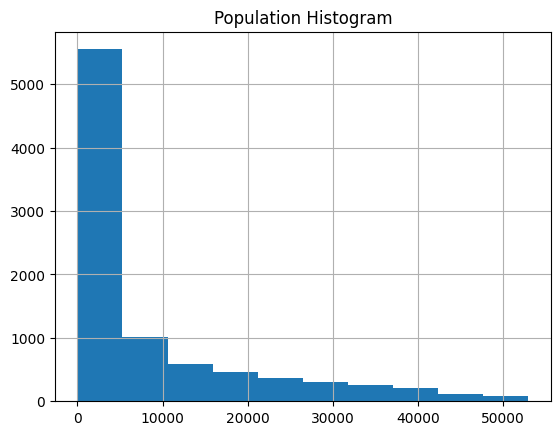

In [29]:
df['Population'].hist()
plt.title('Population Histogram')
plt.show()

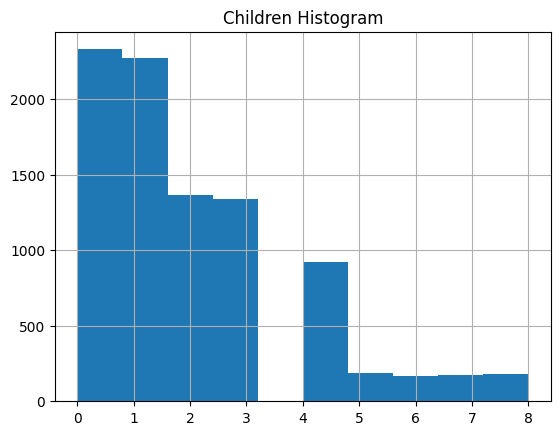

In [30]:
df['Children'].hist()
plt.title('Children Histogram')
plt.show()

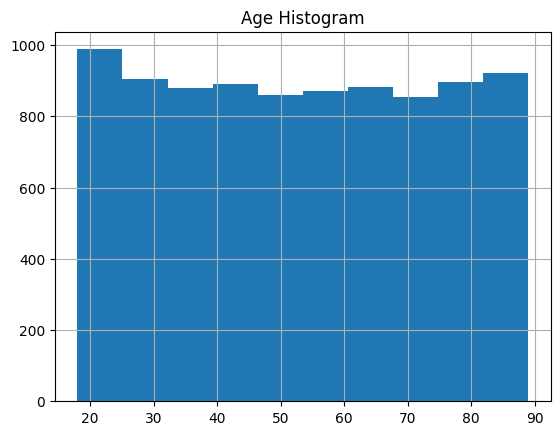

In [31]:
df['Age'].hist()
plt.title('Age Histogram')
plt.show()

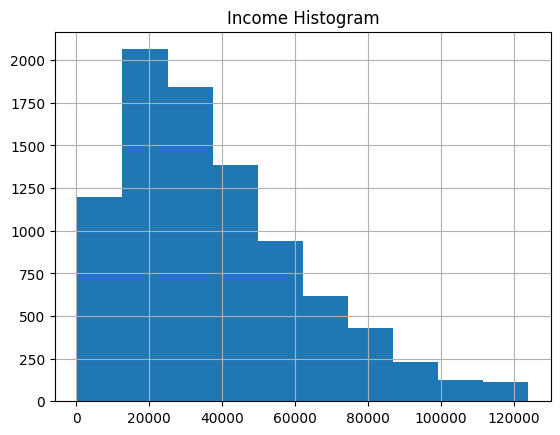

In [32]:
df['Income'].hist()
plt.title('Income Histogram')
plt.show()

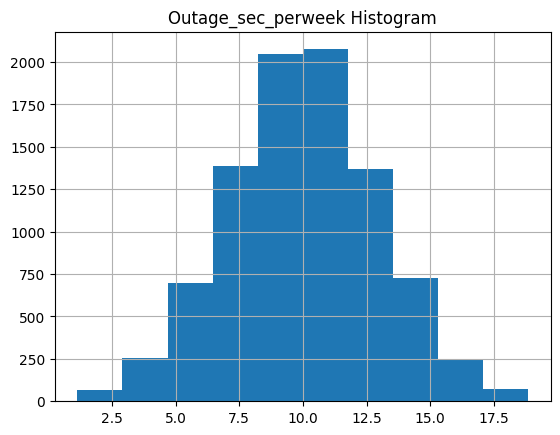

In [33]:
df['Outage_sec_perweek'].hist()
plt.title('Outage_sec_perweek Histogram')
plt.show()

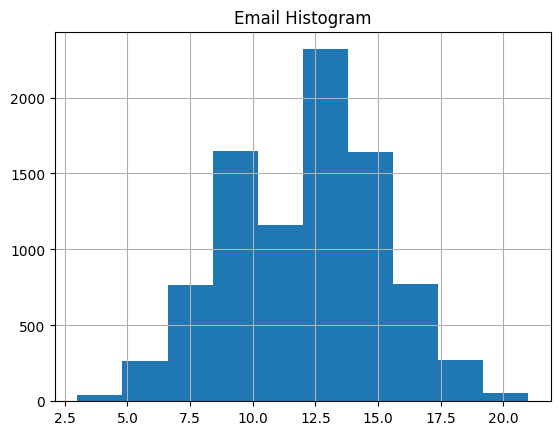

In [34]:
df['Email'].hist()
plt.title('Email Histogram')
plt.show()

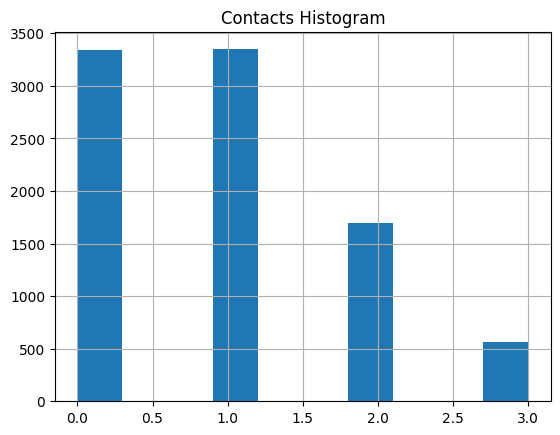

In [35]:
df['Contacts'].hist()
plt.title('Contacts Histogram')
plt.show()

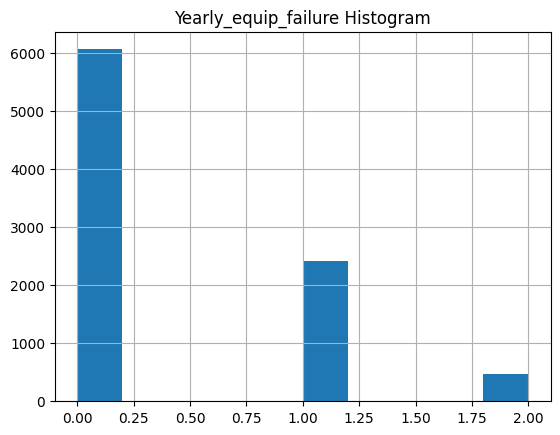

In [36]:
df['Yearly_equip_failure'].hist()
plt.title('Yearly_equip_failure Histogram')
plt.show()

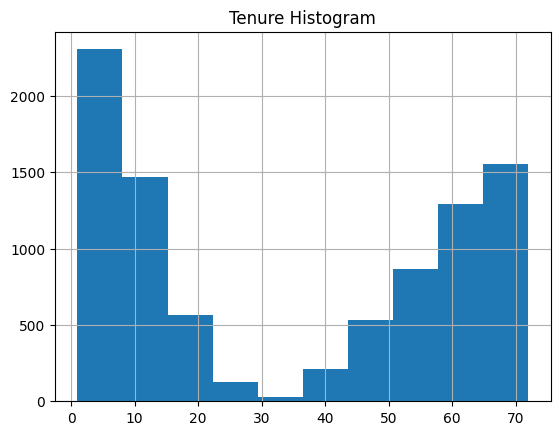

In [37]:
df['Tenure'].hist()
plt.title('Tenure Histogram')
plt.show()

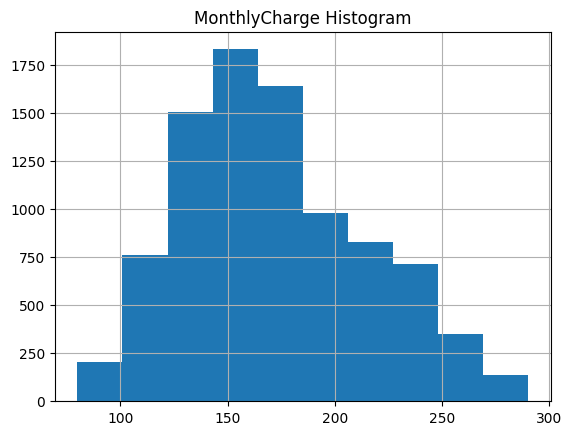

In [38]:
df['MonthlyCharge'].hist()
plt.title('MonthlyCharge Histogram')
plt.show()

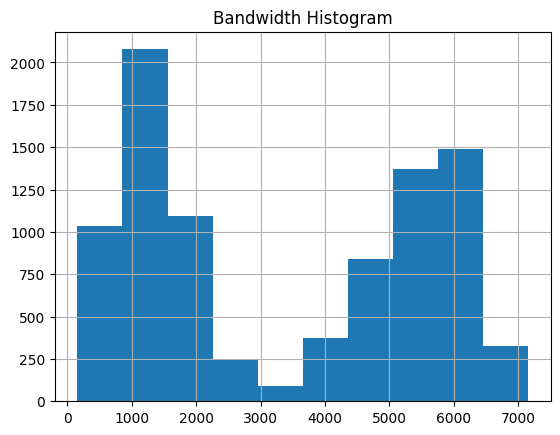

In [40]:
df['Bandwidth_GB_Year'].hist()
plt.title('Bandwidth Histogram')
plt.show()

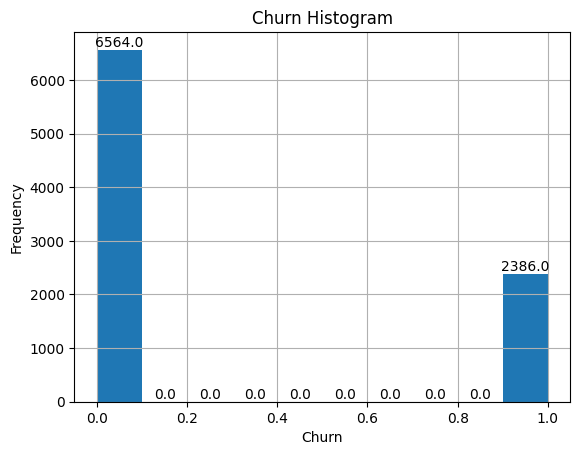

In [41]:
ax = df['DummyChurn'].hist()

# add counts to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# add chart title and axis labels
plt.title('Churn Histogram')
plt.xlabel('Churn')
plt.ylabel('Frequency')

# display the chart
plt.show()

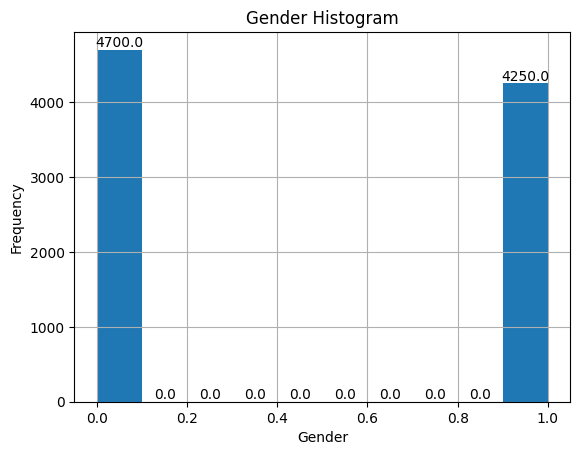

In [42]:
ax = df['DummyGender'].hist()

# add counts to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# add chart title and axis labels
plt.title('Gender Histogram')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# display the chart
plt.show()

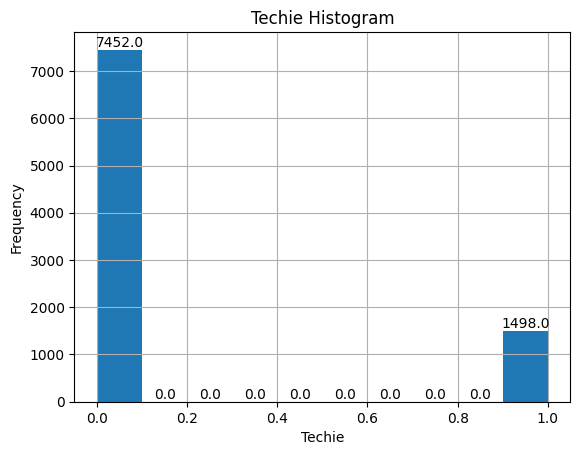

In [43]:
ax = df['DummyTechie'].hist()

# add counts to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# add chart title and axis labels
plt.title('Techie Histogram')
plt.xlabel('Techie')
plt.ylabel('Frequency')

# display the chart
plt.show()

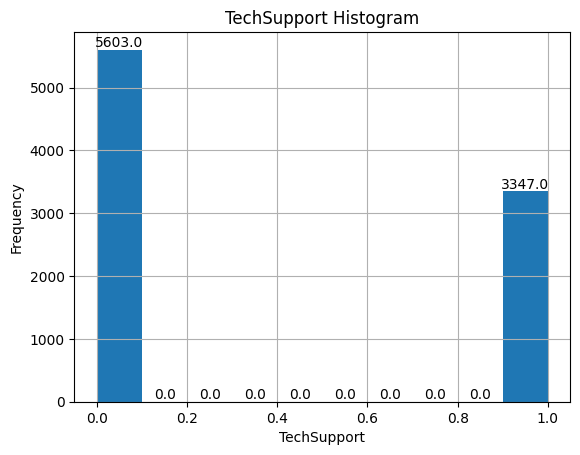

In [44]:
ax = df['DummyTechSupport'].hist()

# add counts to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# add chart title and axis labels
plt.title('TechSupport Histogram')
plt.xlabel('TechSupport')
plt.ylabel('Frequency')

# display the chart
plt.show()

## Bivariant Analysis

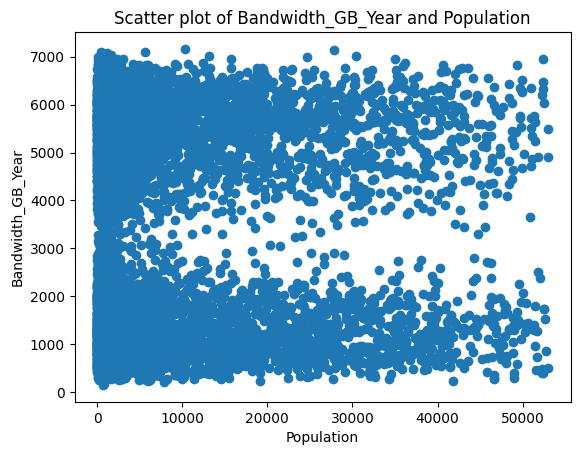

In [45]:
plt.scatter(df['Population'], df['Bandwidth_GB_Year'])
plt.xlabel('Population')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Population')
plt.show()

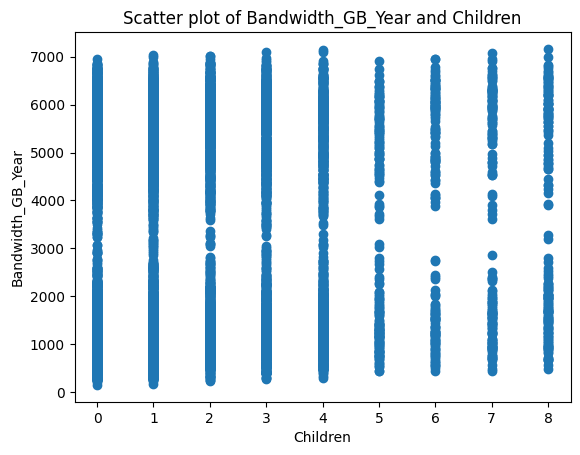

In [46]:
plt.scatter(df['Children'], df['Bandwidth_GB_Year'])
plt.xlabel('Children')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Children')
plt.show()

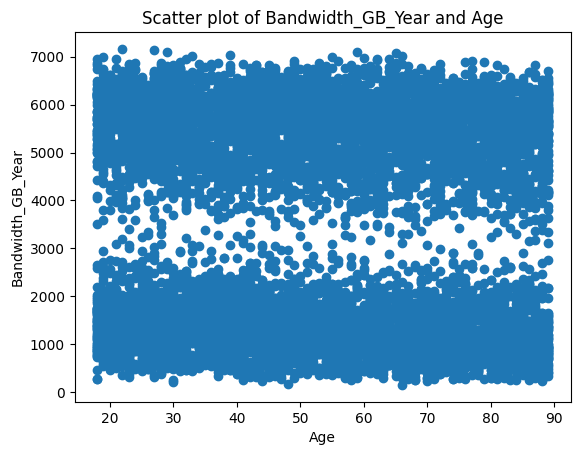

In [47]:
plt.scatter(df['Age'], df['Bandwidth_GB_Year'])
plt.xlabel('Age')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Age')
plt.show()

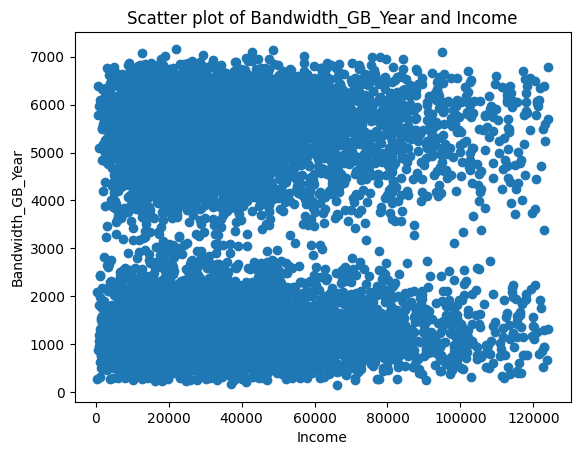

In [48]:
plt.scatter(df['Income'], df['Bandwidth_GB_Year'])
plt.xlabel('Income')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Income')
plt.show()

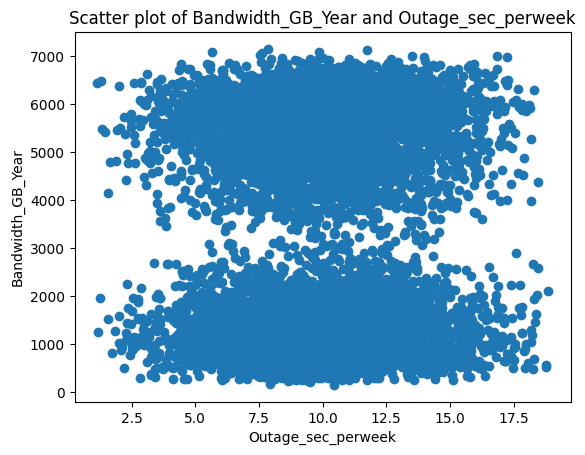

In [49]:
plt.scatter(df['Outage_sec_perweek'], df['Bandwidth_GB_Year'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Outage_sec_perweek')
plt.show()

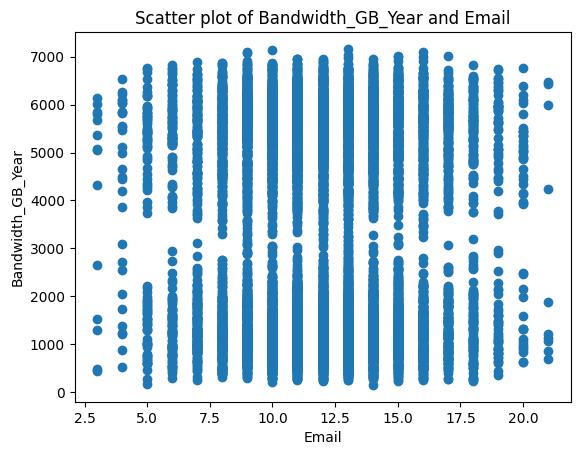

In [50]:
plt.scatter(df['Email'], df['Bandwidth_GB_Year'])
plt.xlabel('Email')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Email')
plt.show()

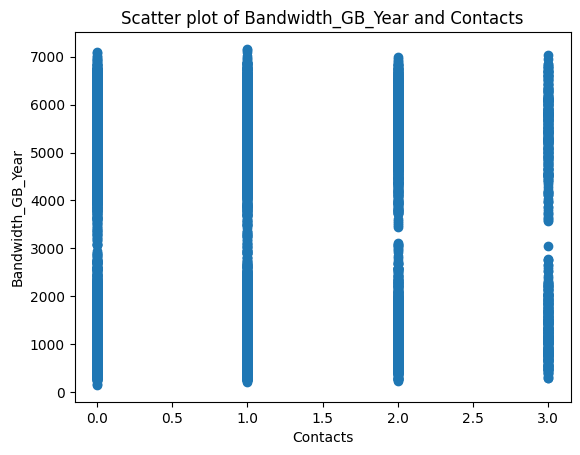

In [51]:
plt.scatter(df['Contacts'], df['Bandwidth_GB_Year'])
plt.xlabel('Contacts')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Contacts')
plt.show()

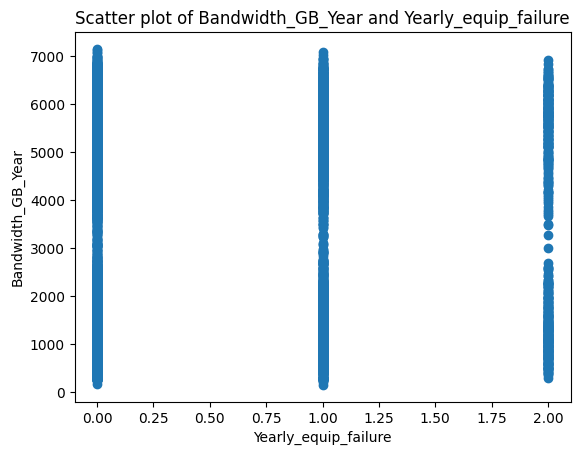

In [52]:
plt.scatter(df['Yearly_equip_failure'], df['Bandwidth_GB_Year'])
plt.xlabel('Yearly_equip_failure')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Yearly_equip_failure')
plt.show()

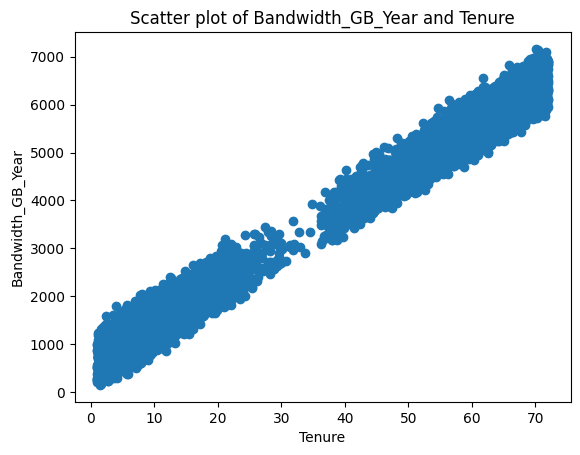

In [53]:
plt.scatter(df['Tenure'], df['Bandwidth_GB_Year'])
plt.xlabel('Tenure')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Tenure')
plt.show()

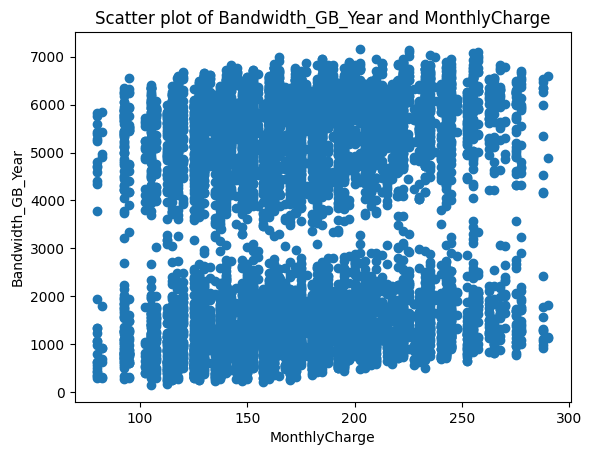

In [54]:
plt.scatter(df['MonthlyCharge'], df['Bandwidth_GB_Year'])
plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and MonthlyCharge')
plt.show()

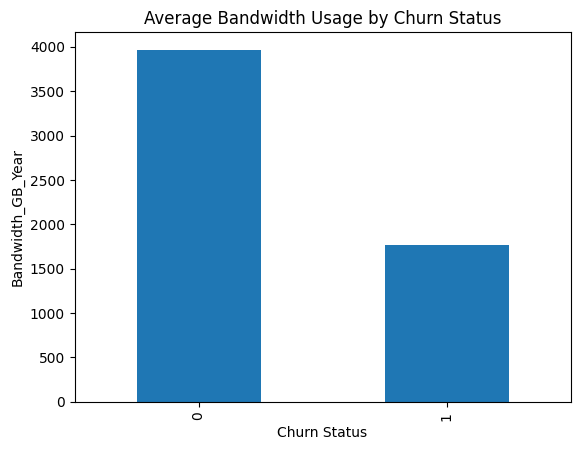

In [55]:
#create a grouped dataframe based on the 'DummyChurn' variable
grouped_df = df.groupby('DummyChurn')['Bandwidth_GB_Year'].mean()

# create a bar chart
grouped_df.plot(kind='bar')
plt.title('Average Bandwidth Usage by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

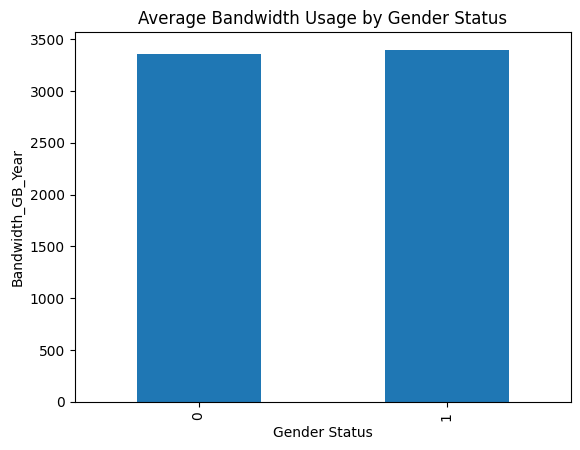

In [56]:
#create a grouped dataframe based on the 'DummyChurn' variable
grouped_df = df.groupby('DummyGender')['Bandwidth_GB_Year'].mean()

# create a bar chart
grouped_df.plot(kind='bar')
plt.title('Average Bandwidth Usage by Gender Status')
plt.xlabel('Gender Status')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

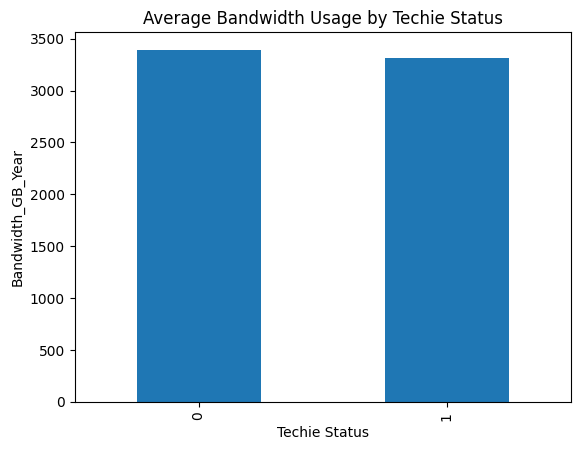

In [57]:
#create a grouped dataframe based on the 'DummyChurn' variable
grouped_df = df.groupby('DummyTechie')['Bandwidth_GB_Year'].mean()

# create a bar chart
grouped_df.plot(kind='bar')
plt.title('Average Bandwidth Usage by Techie Status')
plt.xlabel('Techie Status')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

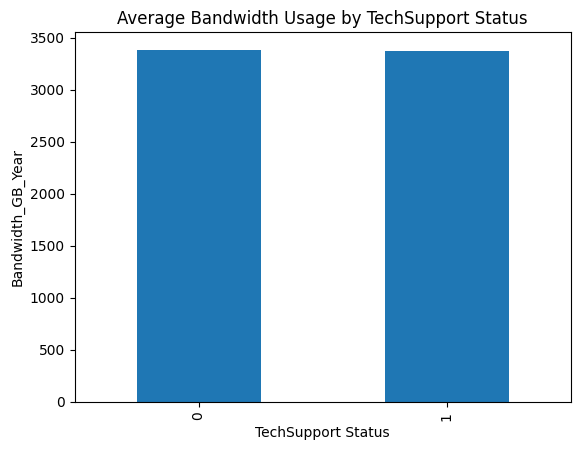

In [58]:
#create a grouped dataframe based on the 'DummyChurn' variable
grouped_df = df.groupby('DummyTechSupport')['Bandwidth_GB_Year'].mean()

# create a bar chart
grouped_df.plot(kind='bar')
plt.title('Average Bandwidth Usage by TechSupport Status')
plt.xlabel('TechSupport Status')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

# Saved to new file

In [59]:
# Prepared dataset saved to new file 
df.to_csv('D208_task1_revision1.csv', index=False)

# Linear Regression Model 

### Inital Model

In [60]:
# Set up your independent and dependent variables
X = df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Population: 1.52
Children: 2.02
Age: 6.81
Income: 3.18
Outage_sec_perweek: 10.32
Email: 12.39
Contacts: 2.06
Yearly_equip_failure: 1.40
Tenure: 3.68
MonthlyCharge: 16.51
DummyChurn: 2.20
DummyGender: 1.89
DummyTechie: 1.20
DummyTechSupport: 1.63
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.187e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:54   Log-Likelihood:                -61005.
No. Observations:                8950   AIC:                         1.220e+05
Df Residuals:                    8935   BIC:                         1.221e+05
Df Model:                          14                                         
Covariance Type:            nonrobust      

### Reduced Model with VIF (removal of 'Population')

In [61]:
# reduced model with removeal of population due to p-value of 0.932 
X = df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 2.02
Age: 6.80
Income: 3.18
Outage_sec_perweek: 10.29
Email: 12.32
Contacts: 2.06
Yearly_equip_failure: 1.40
Tenure: 3.68
MonthlyCharge: 16.47
DummyChurn: 2.20
DummyGender: 1.89
DummyTechie: 1.20
DummyTechSupport: 1.63
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.664e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:54   Log-Likelihood:                -61005.
No. Observations:                8950   AIC:                         1.220e+05
Df Residuals:                    8936   BIC:                         1.221e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                       

### Reduced Model with VIF (removal of 'Outage_sec_perweek')

In [62]:
# reduced model with removal of Outage_sec_per due to p-value of 0.840 and VIF of 10.29
X = df[['Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 2.01
Age: 6.63
Income: 3.15
Email: 11.24
Contacts: 2.05
Yearly_equip_failure: 1.40
Tenure: 3.67
MonthlyCharge: 15.08
DummyChurn: 2.20
DummyGender: 1.88
DummyTechie: 1.20
DummyTechSupport: 1.62
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.220e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:55   Log-Likelihood:                -61005.
No. Observations:                8950   AIC:                         1.220e+05
Df Residuals:                    8937   BIC:                         1.221e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
       

### Reduced Model with VIF (removal of Email')

In [63]:
# reduced model with removal of 'Email' due to p-value of 0.528 and VIF of 11.24
X = df[['Children', 'Age', 'Income', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.98
Age: 6.12
Income: 3.07
Contacts: 2.03
Yearly_equip_failure: 1.40
Tenure: 3.64
MonthlyCharge: 11.93
DummyChurn: 2.19
DummyGender: 1.86
DummyTechie: 1.20
DummyTechSupport: 1.62
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.877e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:55   Log-Likelihood:                -61005.
No. Observations:                8950   AIC:                         1.220e+05
Df Residuals:                    8938   BIC:                         1.221e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    

### Reduced Model with VIF (removal of 'MonthlyCharge')

In [64]:
# reduced model with removal of 'MonthlyCharge due to p-value of 0.000 but VIF of 11.93
X = df[['Children', 'Age', 'Income', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.92
Age: 4.87
Income: 2.88
Contacts: 1.97
Yearly_equip_failure: 1.38
Tenure: 2.92
DummyChurn: 1.63
DummyGender: 1.81
DummyTechie: 1.20
DummyTechSupport: 1.56
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.910e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:56   Log-Likelihood:                -62006.
No. Observations:                8950   AIC:                         1.240e+05
Df Residuals:                    8939   BIC:                         1.241e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std er

### Reduced Model with VIF (removal of 'Contacts')

In [65]:
# reduced model with removal of 'Contacts' due to p-value of 0.903 
X = df[['Children', 'Age', 'Income',  'Yearly_equip_failure',
       'Tenure', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.92
Age: 4.67
Income: 2.85
Yearly_equip_failure: 1.38
Tenure: 2.88
DummyChurn: 1.62
DummyGender: 1.80
DummyTechie: 1.20
DummyTechSupport: 1.55
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 7.679e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:56   Log-Likelihood:                -62006.
No. Observations:                8950   AIC:                         1.240e+05
Df Residuals:                    8940   BIC:                         1.241e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t   

### Reduced Model with VIF (removal of 'Yearly_equip_failure')

In [66]:
# reduced model with removal of 'Yearly_equip_failure' due to p-value of 0.815 
X = df[['Children', 'Age', 'Income','Tenure', 'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.91
Age: 4.60
Income: 2.84
Tenure: 2.86
DummyChurn: 1.61
DummyGender: 1.80
DummyTechie: 1.20
DummyTechSupport: 1.55
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 8.639e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:56   Log-Likelihood:                -62006.
No. Observations:                8950   AIC:                         1.240e+05
Df Residuals:                    8941   BIC:                         1.241e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975

### Reduced Model with VIF (removal of 'TechSupport')

In [67]:
# reduced model with removal of 'TechSupport' due to p-value of 0.410 
X = df[['Children', 'Age', 'Income','Tenure', 'DummyChurn', 'DummyGender', 'DummyTechie']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.90
Age: 4.46
Income: 2.82
Tenure: 2.83
DummyChurn: 1.60
DummyGender: 1.80
DummyTechie: 1.20
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 9.874e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:56   Log-Likelihood:                -62006.
No. Observations:                8950   AIC:                         1.240e+05
Df Residuals:                    8942   BIC:                         1.241e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Reduced Model with VIF (removal of 'DummyTechie')

In [68]:
# reduced model with removal of 'DummyTechie' due to p-value of 0.092 
X = df[['Children', 'Age', 'Income','Tenure', 'DummyChurn', 'DummyGender', ]]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.90
Age: 4.44
Income: 2.82
Tenure: 2.82
DummyChurn: 1.58
DummyGender: 1.80
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.152e+05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:56   Log-Likelihood:                -62008.
No. Observations:                8950   AIC:                         1.240e+05
Df Residuals:                    8943   BIC:                         1.241e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

### Final Reduced Model

In [69]:
# reduced model with removal of ' Income due to p-value of 0.167 
X = df[['Children', 'Age','Tenure', 'DummyChurn', 'DummyGender']]
y = df['Bandwidth_GB_Year']

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Children: 1.87
Age: 3.87
Tenure: 2.68
DummyChurn: 1.55
DummyGender: 1.79
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.382e+05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:57   Log-Likelihood:                -62009.
No. Observations:                8950   AIC:                         1.240e+05
Df Residuals:                    8944   BIC:                         1.241e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

# Mean Squared Error/Residual Squared Error

In [70]:
from sklearn.metrics import mean_squared_error

X = df[['Children', 'Age','Tenure', 'DummyChurn', 'DummyGender']]
y = df['Bandwidth_GB_Year']

# Fit reduced model
model = sm.OLS(y, sm.add_constant(X[['Children', 'Age','Tenure', 'DummyChurn', 'DummyGender']])).fit()

# Get predicted values and actual values
y_pred = model.predict(sm.add_constant(X[['Children', 'Age','Tenure', 'DummyChurn', 'DummyGender']]))
y_true = y

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)


print("Mean Squared Error: ", mse)


# Calculate RSE
rse = np.sqrt(mse)
print("Residual Squared Error: ", rse)


Mean Squared Error:  61013.544358285566
Residual Squared Error:  247.00919893454488


# standardized coefficients

In [71]:
# Fit the OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the coefficient estimates and standard errors
coef = model.params.values[1:]
std_err = model.bse[1:]

# Calculate the standard deviation of each predictor variable
std_dev = np.std(X.iloc[:, 1:], axis=0)

# Standardize the coefficients
coef_std = coef / std_dev

# Print the standardized coefficients
print(coef_std)

Children        16.721955
Age             -0.160593
Tenure           3.181423
DummyChurn     591.107400
DummyGender    145.026497
dtype: float64


# Coefficients

In [72]:
# create some sample data
X = np.random.rand(100, 5)
y = np.random.rand(100)

# fit the linear regression model
reg = LinearRegression().fit(X, y)

# get the coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [ 0.16071857  0.00768219  0.07958124  0.12358997 -0.07641851]
Intercept: 0.39720720979370583


# Residual Plot

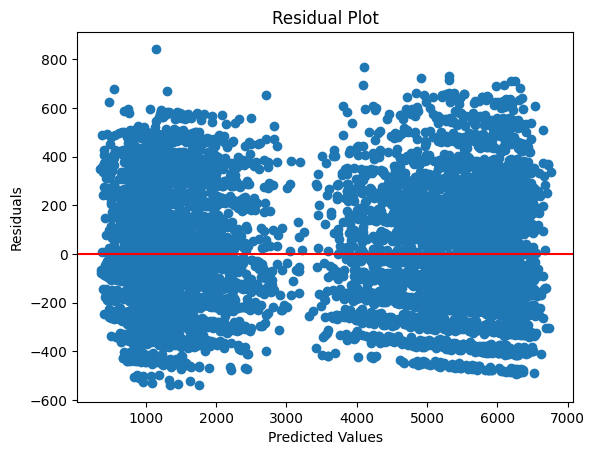

In [73]:
# Define the predictor variables
X = df[['Children', 'Age','Tenure', 'DummyChurn', 'DummyGender']]
y = df['Bandwidth_GB_Year']

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Generate the predicted values
y_pred = model.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Cross-validation (residual standard error)

In [74]:
# Define the logistic regression model
linreg = LinearRegression()

# Define the independent and dependent variables
X = df[[ 'Children', 'Age','Tenure', 'DummyChurn', 'DummyGender']]
y = df['Bandwidth_GB_Year']

# Perform cross-validation on the logistic regression model
scores = cross_val_score(linreg, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())



Cross-validation scores: [0.82146388 0.8350788  0.98691488 0.88445365 0.88818804]
Mean score: 0.8832198488973741


# Cooks Distance

In [75]:
# create some sample data
X = np.random.rand(100, 5)
y = np.random.rand(100)

# fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# get the Cook's distance
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

print('Cook\'s distance:', cook_distance)


Cook's distance: [1.69901150e-02 3.15960981e-03 8.91683385e-06 5.67898992e-03
 4.86920593e-03 1.22486653e-02 3.73330625e-03 9.81220458e-04
 2.17988127e-02 1.91708726e-02 1.53518616e-04 3.91456172e-03
 1.58456478e-04 1.25494434e-02 1.28374071e-02 1.04984076e-02
 2.17550058e-02 2.04845707e-03 1.94477054e-02 1.06376817e-04
 5.80312080e-03 3.59199794e-02 5.23087163e-04 1.16941729e-02
 4.75843508e-03 1.31931366e-03 5.20644500e-03 2.61741606e-03
 1.59606913e-02 4.35883096e-03 1.08376328e-02 1.84720906e-02
 3.09892363e-03 4.41469847e-03 5.59888001e-03 1.98459676e-02
 7.27233116e-03 9.34190613e-03 6.29189933e-03 1.13325320e-02
 2.25384286e-02 4.04584967e-03 3.39095332e-05 1.29155291e-03
 6.20441943e-04 3.20354536e-02 5.76336264e-03 3.20426989e-02
 1.65858739e-02 3.81351848e-03 2.63822684e-02 4.53692316e-03
 1.62963241e-04 2.46730562e-02 1.40901053e-02 1.41279693e-02
 2.14870535e-03 2.43693136e-03 5.87139922e-05 3.07159693e-04
 1.41003208e-05 2.21076668e-03 4.77995477e-02 7.75357738e-04
 5.6791